<h1> Model selection: US Salary Prediction</h1>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


train=pd.read_csv('census-training.csv')
print(train.info())
train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
Age              48842 non-null int64
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Gender           48842 non-null object
Hours/Week       48842 non-null int64
Country          48842 non-null object
Income           48842 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [26]:
#TODO
for (columnName, columnData) in train.iteritems():
   print( columnName)
   print( train[columnName].nunique())

Age
74
EducationNum
16
MaritalStatus
7
Occupation
15
Relationship
6
Race
5
Gender
2
Hours/Week
96
Country
42
Income
4


<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [27]:
# Command (s): remove the '?' special character and replace with NaN
#TODO
train=train.replace('?', np.nan)

train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64

<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [28]:
#Command(s):
mode=train.mode() # finding mode to compute the most occuring item in every column
#replace missing values with their mode
#TODO

train['Occupation'].fillna(mode['Occupation'][0], inplace=True)
train['Country'].fillna(mode['Country'][0], inplace=True)


print(mode)#checking the data for NaN values .... should all s,how 0 now

   Age  EducationNum       MaritalStatus      Occupation Relationship   Race  \
0   36             9  Married-civ-spouse  Prof-specialty      Husband  White   

  Gender  Hours/Week        Country Income  
0   Male          40  United-States  <=50K  


<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [29]:
# converting Gender to "0" and "1" 
def gender_to_numeric(x):
    #TODO return 1 f gender is Male, 0 otherwise
    return x.map(dict(Male=1, Female=0))

train['Gender'] = gender_to_numeric(train['Gender']) #TODO apply the function to this column

# converting Inccome to "0" and "1" 
def income_to_numeric(x):
   return x.map({'<=50K.': 1, '>50K.': 0, '<=50K': 1, '>50K': 0})
    
train['Income'] = income_to_numeric(train['Income'])#TODO apply the function to this column

train.head(10)
#print(train.isnull().sum())

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,1
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,1
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,0
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,0
4,18,10,Never-married,Prof-specialty,Own-child,White,0,30,United-States,1
5,34,6,Never-married,Other-service,Not-in-family,White,1,30,United-States,1
6,29,9,Never-married,Prof-specialty,Unmarried,Black,1,40,United-States,1
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,1,32,United-States,0
8,24,10,Never-married,Other-service,Unmarried,White,0,40,United-States,1
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,1,10,United-States,1


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [30]:
# Command(s) 
obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
for i in range(len(obj.columns)):
    train[obj.columns[i]] = le.fit_transform(train[obj.columns[i]])#TODO  #Encode input data
    
train.head(10) #Inspect the data, all features should be numeric now



,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,1
1,38,9,2,4,0,4,1,50,38,1
2,28,12,2,10,0,4,1,40,38,0
3,44,10,2,6,0,2,1,40,38,0
4,18,10,4,9,3,4,0,30,38,1
5,34,6,4,7,1,4,1,30,38,1
6,29,9,4,9,4,2,1,40,38,1
7,63,15,2,9,0,4,1,32,38,0
8,24,10,4,7,4,4,0,40,38,1
9,55,4,2,2,0,4,1,10,38,1


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [31]:
#TODO 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.3, random_state=42)

train_set.head(10)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
42392,25,9,4,2,3,4,1,40,38,1
14623,64,9,6,11,1,4,0,17,38,1
27411,29,9,2,2,0,4,1,40,6,1
1288,28,11,2,2,0,4,1,50,38,1
7078,22,9,4,6,2,2,1,1,38,1
30880,36,9,2,2,0,4,1,64,38,0
1334,63,3,2,11,0,4,1,25,38,1
15750,52,9,0,7,3,2,0,40,38,1
22955,36,10,2,2,0,4,1,45,38,1
45448,20,10,4,5,3,4,0,40,38,1


<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

In [32]:
#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

y_train = train_set['Income']
X_train = train_set.drop('Income', axis=1)
log_rgr = LogisticRegression()#TODO Initialize logistic regression classifier
# TODO: fit X_train and y_train
log_rgr.fit(X_train,y_train)

y_test = test_set['Income']
X_test = test_set.drop('Income',axis=1)
#predict on the test set
y_pred = log_rgr.predict(X_test)
lr_acc = log_rgr.score(X_test,y_test) #TODO: Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8110967037466731
AUC: 0.8248933150705186


<Figure size 640x480 with 1 Axes>

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

Accuracy: 0.7986077936258786
AUC: 0.7960151350214464


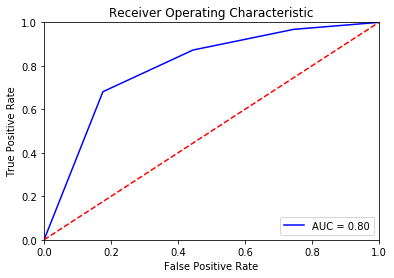

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)#TODO Initialize KNN classifier with k=15
# TODO: fit X_train and y_train
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = knn.score(X_test, y_test)#TODO: Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)#TODO
print("Accuracy: {}".format(knn_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Compare results
#TODO

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [36]:
from sklearn.feature_selection import RFE

rfe =  RFE(estimator=LogisticRegression(), n_features_to_select=3)
# TODO: fit X_train and y_train
rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
lr_acc = rfe.score(X_test, y_test)#TODO: Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc =metrics.auc(fpr, tpr) #TODO
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.8133488022930458
AUC: 0.7961308524434324


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
